Mean simulated X1 and X_exact for each time step size:
      N  Mean_X_at_t1    X_exact
0   100     21.744036  22.167168
1   200     21.944536  22.167168
2   400     22.061762  22.167168
3   800     22.100338  22.167168
4  1600     22.115136  22.167168
5  3200     22.181610  22.167168


Table of errors:
      N  Weak_Error  Strong_Error
0   100    0.423133      1.757167
1   200    0.222632      1.740862
2   400    0.105406      1.763444
3   800    0.066831      1.752754
4  1600    0.052033      1.755792
5  3200    0.014442      1.764946


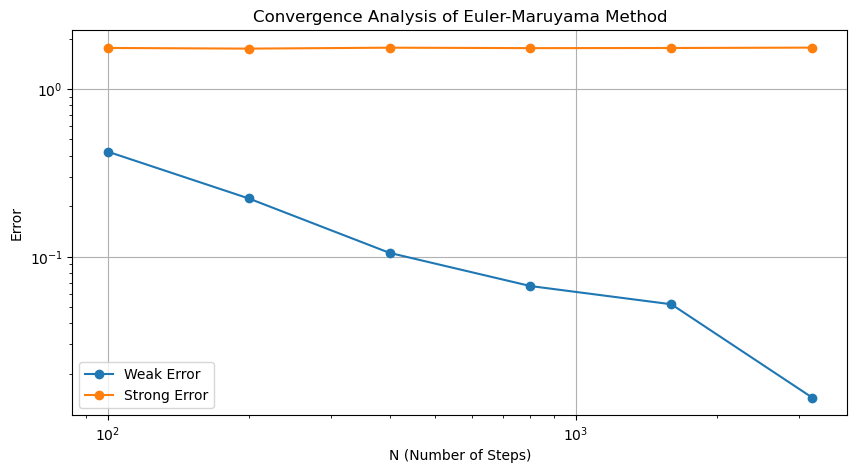

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
mu = 2
sigma = 0.10
X0 = 3

# Function to run a single simulation
def run_simulation(N):
    T = 1
    dt = T / N
    t = np.linspace(0, T, N + 1)
    W = np.zeros(N + 1)
    X = np.zeros(N + 1)
    X[0] = X0
    for i in range(N):
        dw = np.random.normal(0, np.sqrt(dt))
        X[i + 1] = X[i] + mu * X[i] * dt + sigma * X[i] * dw
        W[i + 1] = W[i] + dw
    return t, X

# Function to compute the errors for a given number of simulations and N
def compute_errors(num_sims, N):
    X_at_t1_values = []
    for _ in range(num_sims):
        _, X = run_simulation(N)
        X_at_t1_values.append(X[-1])  # Store 'X' value at t=1 for this simulation

    X_exact = X0 * np.exp(mu)  # Exact solution at t=1
    mean_X_at_t1 = np.mean(X_at_t1_values)
    weak_error = abs(mean_X_at_t1 - X_exact)  # Weak error
    strong_error = np.mean(abs(np.array(X_at_t1_values) - X_exact))  # Strong error
    return mean_X_at_t1, X_exact, weak_error, strong_error

if __name__ == "__main__":
    num_sims = 20000
    N_values = [100, 200, 400, 800, 1600, 3200]  # Different values of N (time step sizes)
    results = []

    # Compute errors for each value of N
    for N in N_values:
        mean_X_at_t1, X_exact, weak_error, strong_error = compute_errors(num_sims, N)
        results.append([N, mean_X_at_t1, X_exact, weak_error, strong_error])

    # Create a DataFrame to display results
    df = pd.DataFrame(results, columns=['N', 'Mean_X_at_t1', 'X_exact', 'Weak_Error', 'Strong_Error'])

    # Print mean simulated X1 and X_exact for each time step size
    print("Mean simulated X1 and X_exact for each time step size:")
    print(df[['N', 'Mean_X_at_t1', 'X_exact']])
    print("\n")

    # Print table of errors
    print("Table of errors:")
    print(df[['N', 'Weak_Error', 'Strong_Error']])

    # Plot errors
    plt.figure(figsize=(10, 5))
    plt.loglog(df['N'], df['Weak_Error'], marker='o', label='Weak Error')
    plt.loglog(df['N'], df['Strong_Error'], marker='o', label='Strong Error')
    plt.xlabel('N (Number of Steps)')
    plt.ylabel('Error')
    plt.title('Convergence Analysis of Euler-Maruyama Method')
    plt.legend()
    plt.grid(True)
    plt.show()
